# Kinetics of Protein Folding

In a simplistic model of protein folding, a protein can exist in either the unfolded or the folded state. This model ignores possible intermediate, partially folded states. We will use this simple model to study the transition between the unfolded and folded states.

Let us assume that unfolded proteins will transition to the folded state at rate $k_f$, and folded proteins will transition to the unfolded state at rate $k_u$. If we denote the unfolded and folded states by $U$ and $F$, respectively, then the transitions can be represented by the reactions:
\begin{align}
U \xrightarrow{k_f} F \\
F \xrightarrow{k_u} U
\end{align}
Note that the rates $k_f$ and $k_u$ are *per capita*, so the overall rate of transitions will be proportional to the number of reactants.

By now you already know how to simulate such stochastic processes using the Gillespie algorithm. Here, however, we are interested in the *kinetics* of the reactions, e.g., how fast the numbers of reactants approach their equilibrium values. For that purpose, it suffices to study the *average* behavior of the numbers of reactants, i.e., to use a **deterministic approximation** of their dynamics. (Arguably, this is even simpler than the stochastic simulations.)

Let $N_U$ and $N_F$ be the numbers of unfolded and folded proteins, respectively. We will derive the dynamical equations that they obey. Note that $N_U$ and $N_F$ should in principle be discrete integers, but in the deterministic approximation we will treat them as if they are continuous real numbers. In a short time period $dt$, there will be, on average, $N_U k_f dt$ unfolded proteins that transition to the folded state, and $N_F k_u dt$ folded proteins that become unfolded. (Recall that the number of transition events should really be a Poisson distributed random number, with the mean given by those expressions.) Therefore, the number of unfolded proteins will change by $dN_U = N_F k_u dt - N_U k_f dt$, and the number of folded proteins will change by the opposite. Dividing by $dt$, we arrive at the differential equations:
\begin{align}
\frac{dN_U}{dt} &= + k_u N_F - k_f N_U \\
\frac{dN_F}{dt} &= - k_u N_F + k_f N_U
\end{align}

At equilibrium, we expect both time derivatives to be 0. That implies $k_u N_F^{eq} = k_f N_U^{eq}$, hence:
\begin{equation}
\frac{N_F^{eq}}{N_U^{eq}} = \frac{k_f}{k_u} \equiv K
\end{equation}
That is, the ratio of the folded and unfolded proteins is given by the ratio of the transition rates, which is called the equilibrium constant $K$. Since the total number of unfolded and folded proteins is conserved, $N_U + N_F = N_{tot}$, their equilibrium numbers would be:
\begin{equation}
N_U^{eq} = \frac{1}{1+K} N_{tot} \,, \quad N_F^{eq} = \frac{K}{1+K} N_{tot}
\end{equation}

When the numbers of unfolded and folded proteins are not at equilibrium, their dynamics are approximately described by the rate equations above. To see that such dynamics do represent the *average* behavior of the underlying stochastic processes, we will first simulate these processes like before. Then we will numerically solve those differential equations and compare the solutions to the simulation results.

## Stochastic simulations

Let us first define a simulation class using the `StochSimulation` base class that we had before.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Gillespie import StochSimulation    # import the base class saved in the script `Gillespie.py`

In [2]:
class FoldingUnfolding(StochSimulation):
    """
    define a derived class to model the folding and unfolding of proteins.
    """
    
    def __init__(self, rates, init, record=True):    # decorate base method
        """
        modify the initialization to specify the stoichiometry matrices.
        the chemical species are U and F in that order; the reactions are U -> F and F -> U.
        """
        reactants = [[1, 0],
                     [0, 1]]
        products = [[0, 1],
                    [1, 0]]
        StochSimulation.__init__(self, (reactants, products), rates, init, record=record)

Now we choose the parameters and initial values, then run the simulation multiple times.

In [3]:
kf = 9.    # folding rate
ku = 1.    # unfolding rate

NU0 = 100    # initial number of unfolded proteins
NF0 = 0    # initial number of folded proteins
N_tot = NU0 + NF0    # total number of proteins

K = kf / ku    # equilibrium constant
NUeq = 1/(1+K) * N_tot    # equilibrium number of unfolded proteins
NFeq = K/(1+K) * N_tot    # equilibrium number of folded proteins

In [4]:
T = 1.    # total amount of time to simulate
trials = 10    # number of simulations to repeat
fu_list = []    # list of simulations

for i in range(trials):
    fu1 = FoldingUnfolding([kf, ku], [NU0, NF0], record=True)
    fu1.run(T)
    print(f'current time = {fu1.time}, current numbers of unfolded and folded protein = {fu1.numbers}')
    fu_list.append(fu1)

current time = 1.0047517408322153, current numbers of unfolded and folded protein = [ 8 92]
current time = 1.0028892526832816, current numbers of unfolded and folded protein = [10 90]
current time = 1.0133952655437546, current numbers of unfolded and folded protein = [11 89]
current time = 1.0188621737864618, current numbers of unfolded and folded protein = [ 5 95]
current time = 1.0023558104035135, current numbers of unfolded and folded protein = [ 8 92]
current time = 1.0018249014117626, current numbers of unfolded and folded protein = [17 83]
current time = 1.004495906909637, current numbers of unfolded and folded protein = [ 9 91]
current time = 1.0035735466468143, current numbers of unfolded and folded protein = [ 7 93]
current time = 1.0045166804604957, current numbers of unfolded and folded protein = [13 87]
current time = 1.0018275857342773, current numbers of unfolded and folded protein = [ 8 92]


Here are the simulated trajectories. Note that the codes are very similar to the simulations we did before for the protein production and degradation model, with slight modifications.

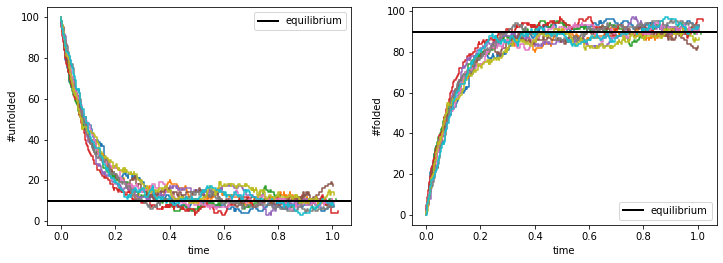

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for fu1 in fu_list:
    time_hist = np.asarray(fu1.time_hist)    # extract time history
    num_hist = np.asarray(fu1.numbers_hist)    # extract number history of all species
    ax[0].plot(time_hist, num_hist[:,0], drawstyle='steps-post')    # number of unfolded proteins
    ax[1].plot(time_hist, num_hist[:,1], drawstyle='steps-post')    # number of folded proteins
ax[0].axhline(NUeq, color='k', linewidth=2, label='equilibrium')    # expected number at equilibrium
ax[1].axhline(NFeq, color='k', linewidth=2, label='equilibrium')    # expected number at equilibrium
ax[0].set_xlabel('time')
ax[0].set_ylabel('#unfolded')
ax[0].legend(loc='upper right')
ax[1].set_xlabel('time')
ax[1].set_ylabel('#folded')
ax[1].legend(loc='lower right')
plt.show()

As expected, the folded and unfolded protein numbers approach their equilibrium values, and we see stochastic fluctuations over time and between trajectories.

## Deterministic equations

Let us numerically solve the deterministic equations derived above. To do that properly, we will use the `odeint` function from the `scipy.integrate` package. First, we need to define a function that takes as input the vector of numbers $(N_U, N_F)$ and outputs a vector of time derivatives $(dN_U/dt, dN_F/dt)$ according to the rate equations.

In [6]:
import scipy.integrate as intgr

In [7]:
def dNdt(x, t):
    """
    calculate the time derivatives of the numbers of unfolded and folded proteins.
    inputs:
    x: 1-d array, numbers of unfolded and folded proteins, [N_U, N_F].
    t: float, time (in case the equations depend on time explicitly, not used here).
    outputs:
    dxdt: 1-d array, time derivatives, [dN_U/dt, dN_F/dt]
    """
    NU, NF = x    # parse the vector x into components NF, NU
    dNUdt = ku * NF - kf * NU    # calculate dN_U/dt
    dNFdt = - ku * NF + kf * NU    # calculate dN_F/dt
    dxdt = [dNUdt, dNFdt]    # combine derivatives into a vector
    return dxdt

Now we can integrate our differential equations using `odeint`. We specify a set of time points at which we would like to know the values of the variables. Then we ask the function `odeint` to return these values at given time points.

In [8]:
time_points = np.linspace(0, T, 101)    # selected time points
x0 = [NU0, NF0]    # initial values as a vector
sol = intgr.odeint(dNdt, x0, time_points)    # solve ODE

The solution is an array of shape ($n_t$, $n_v$), where the first axis is the number of time points, and the second axis is the number of variables. We can now plot these solutions on top of the simulation results.

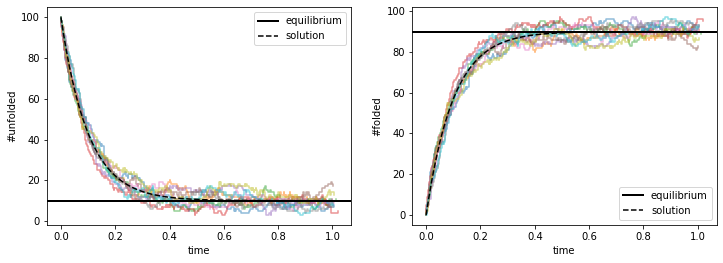

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for fu1 in fu_list:
    time_hist = np.asarray(fu1.time_hist)    # extract time history
    num_hist = np.asarray(fu1.numbers_hist)    # extract number history of all species
    ax[0].plot(time_hist, num_hist[:,0], drawstyle='steps-post', alpha=0.5)    # number of unfolded proteins
    ax[1].plot(time_hist, num_hist[:,1], drawstyle='steps-post', alpha=0.5)    # number of folded proteins
ax[0].axhline(NUeq, color='k', linewidth=2, label='equilibrium')    # expected number at equilibrium
ax[1].axhline(NFeq, color='k', linewidth=2, label='equilibrium')    # expected number at equilibrium
ax[0].plot(time_points, sol[:,0], 'k--', label='solution')    # solution to the rate equations
ax[1].plot(time_points, sol[:,1], 'k--', label='solution')    # solution to the rate equations
ax[0].set_xlabel('time')
ax[0].set_ylabel('#unfolded')
ax[0].legend(loc='upper right')
ax[1].set_xlabel('time')
ax[1].set_ylabel('#folded')
ax[1].legend(loc='lower right')
plt.show()

We see that the solutions do a great job tracing out the *average* behavior of the stochastic trajectories. Mathematically, since the equations are linear in $(N_U, N_F)$, they can be solved easily and the solutions are:
\begin{align}
N_U(t) &= N_U^{eq} + \big( N_U(0) - N_U^{eq} \big) \, \mathrm{e}^{-k t} \\
N_F(t) &= N_F^{eq} - \big( N_F^{eq} - N_F(0) \big) \, \mathrm{e}^{-k t}
\end{align}
That is, the numbers of unfolded and folded proteins approach their equilibrium values exponentially, e.g., $N_F^{eq} - N_F(t) \sim \mathrm{e}^{-k t}$, where $k = k_f + k_u$. This can be better seen by plotting $(N_F^{eq} - N_F)$ on the log scale.

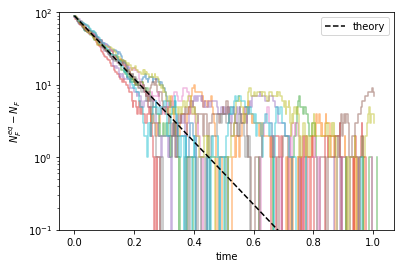

In [10]:
num_points = (NFeq - NF0) * np.exp(-(kf+ku) * time_points)    # theoretical solution

plt.figure()
for fu1 in fu_list:
    time_hist = np.asarray(fu1.time_hist)    # extract time history
    num_hist = np.asarray(fu1.numbers_hist)    # extract number history of all species
    plt.plot(time_hist, NFeq - num_hist[:,1], drawstyle='steps-post', alpha=0.5)    # number of folded proteins
plt.plot(time_points, num_points, 'k--', label='theory')    # plot theoretical solution
plt.ylim(0.1, 100)
plt.yscale('log')    # change to log scale
plt.xlabel('time')
plt.ylabel(r'$N_F^{eq} - N_F$')
plt.legend(loc='upper right')
plt.show()

## Inferring rate constants from data

If we had the (numerical) experimental data but did not know the parameter values $k_f$ and $k_u$, we can infer these values from the equilibrium constant and the relaxation rate.

In [11]:
def collect_data(time_points, time_hist, num_hist):
    """
    collect data from history of time and numbers, assuming no events happen between consecutive times in history.
    inputs:
    time_points: list (or 1-d array), time points at which to collect numbers.
    time_hist: list (or 1-d array), full history of time of events, assuming no events between times.
    num_hist: list (or 1-d array), full history of number after each event.
    outputs:
    num_points: list, collected numbers at given time points.
    """
    num_points = []    # to collect number at every time point
    if (time_hist[0] > time_points[0]) or (time_hist[-1] < time_points[-1]):   # check if data contain all time points
        raise RuntimeError('time history does not contain all time points')    # if not, report error
    for t in time_points:
        i = np.argmin(np.asarray(time_hist) <= t) - 1    # index of time point just before given time
        num_points.append(num_hist[i])    # get number at the time point
    return num_points

First, the equilibrium constant $K$ can be estimated by finding the average numbers of folded and unfolded proteins and calculating their ratio. For this we will collect data from time points *after* the trajectories have reached equilibrium, say $t > 0.5$.

In [12]:
time_points = np.linspace(0.5, T, 51)    # choose time points
numF_all = []    # collect N_F data from all simulations

for fu1 in fu_list:
    time_hist = np.asarray(fu1.time_hist)    # extract time history
    num_hist = np.asarray(fu1.numbers_hist)    # extract numbers history
    numF_points = collect_data(time_points, time_hist, num_hist[:,1])    # collect numbers of folded proteins
    numF_all.extend(numF_points)

numF_eq = np.mean(numF_all)    # estimate equilibrium number of folded proteins
K_eq = numF_eq / (N_tot - numF_eq)    # estimated equilibrium constant
print(f'estimated equilibrium constant = {K_eq}')
print(f'true equilibrium constant = kf / ku = {K}')

estimated equilibrium constant = 8.906759906759907
true equilibrium constant = kf / ku = 9.0


Then, we can estimate the relaxation rate $k$ from the slope of the trajectories by fitting the data to a straight line in log scale. For this we will collect data from time points *before* the equilibrium is reached, say $t < 0.1$.

In [13]:
time_points = np.linspace(0, 0.1, 11)    # choose time points
numF_all = []    # collect N_F data from all simulations

for fu1 in fu_list:
    time_hist = np.asarray(fu1.time_hist)    # extract time history
    num_hist = np.asarray(fu1.numbers_hist)    # extract numbers history
    numF_points = collect_data(time_points, time_hist, num_hist[:,1])    # collect numbers of folded proteins
    numF_all.extend(numF_points)

time_all = np.tile(time_points, trials)    # use `np.tile()` to repeat an array multiple times
numF_all = np.array(numF_all)
slope, intercept = np.polyfit(time_all, np.log(NFeq - numF_all), 1)    # fit data in log scale to a line
k_relax = -slope    # estimated relaxation rate
print(f'estimated relaxation rate = {k_relax}')
print(f'true relaxation rate = kf + ku = {kf+ku}')

estimated relaxation rate = 9.765429679446495
true relaxation rate = kf + ku = 10.0


From these two combinations $K = k_f / k_u$ and $k = k_f + k_u$, we can eventually infer the values of $k_f$ and $k_u$ by
\begin{equation}
k_f = \frac{K k}{1+K} \,, \quad k_u = \frac{k}{1+K}
\end{equation}

In [14]:
kf_est = K_eq/(1+K_eq) * k_relax
ku_est = 1/(1+K_eq) * k_relax
print(f'estimated kf = {kf_est}, ku = {ku_est}')
print(f'true kf = {kf}, ku = {ku}')

estimated kf = 8.779695718862367, ku = 0.9857339605841284
true kf = 9.0, ku = 1.0
